In [1]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import tensorflow as tf

In [3]:
reset_graph()

x = tf.Variable(6,name="x")
y = tf.Variable(4,name="y")
f = x*x*y + y + 2
f

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [70]:
print(f)

Tensor("add_1:0", shape=(), dtype=int32)


In [71]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)

AttributeError: 'Tensor' object has no attribute 'initializer'

In [72]:
#close session
sess.close()

In [7]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [8]:
result

150

In [9]:
#global inits
init = tf.global_variables_initializer()

In [10]:
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)

150


In [11]:
sess.close()

In [12]:
result

150

# Managing Graphs

In [13]:
reset_graph

<function __main__.reset_graph(seed=42)>

In [14]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [15]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
x2.graph is graph

True

In [16]:
#add variables

w = tf.constant(3)
x = w + 2
y = x + 5
h = x*15
z = x*3

with tf.Session() as sess:
    print(w.eval())
    print(y.eval())
    print(z.eval())
    print(h.eval())


3
10
15
75


In [17]:
with tf.Session() as sess:
    print(w.eval())

3


# Linear Regression
### Using the Normal Equation

In [18]:
import numpy as np
from sklearn.datasets import fetch_california_housing

reset_graph()

housing = fetch_california_housing()
m,n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)),housing.data]

In [19]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [20]:
housing_data_plus_bias

array([[   1.        ,    8.3252    ,   41.        , ...,    2.55555556,
          37.88      , -122.23      ],
       [   1.        ,    8.3014    ,   21.        , ...,    2.10984183,
          37.86      , -122.22      ],
       [   1.        ,    7.2574    ,   52.        , ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.        ,    1.7       ,   17.        , ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.        ,    1.8672    ,   18.        , ...,    2.12320917,
          39.43      , -121.32      ],
       [   1.        ,    2.3886    ,   16.        , ...,    2.61698113,
          39.37      , -121.24      ]])

In [21]:
#init variables for x and y
X = tf.constant(housing_data_plus_bias,
                dtype=tf.float32,name="X")
y = tf.constant(housing.target.reshape(-1,1),
                dtype=tf.float32,name='y')

#traspose X
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)),XT),y)

In [22]:
with tf.Session() as sess:
    print(X.eval())

[[   1.           8.3252      41.        ...    2.5555556   37.88
  -122.23     ]
 [   1.           8.3014      21.        ...    2.1098418   37.86
  -122.22     ]
 [   1.           7.2574      52.        ...    2.80226     37.85
  -122.24     ]
 ...
 [   1.           1.7         17.        ...    2.3256352   39.43
  -121.22     ]
 [   1.           1.8672      18.        ...    2.1232092   39.43
  -121.32     ]
 [   1.           2.3886      16.        ...    2.616981    39.37
  -121.24     ]]


In [23]:
#carry out computation graph
with tf.Session() as sess:
    theta_value = theta.eval()

In [24]:
theta_value
#convert to numpy array

array([[-3.6955223e+01],
       [ 4.3629766e-01],
       [ 9.4330031e-03],
       [-1.0657431e-01],
       [ 6.4040172e-01],
       [-3.9891174e-06],
       [-3.7860912e-03],
       [-4.2141816e-01],
       [-4.3461639e-01]], dtype=float32)

In [25]:
#compare with numpy array
X = housing_data_plus_bias
y = housing.target.reshape(-1,1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta_numpy)

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


In [26]:
#compare differences
np.round((theta_value - theta_numpy),5)

array([[-0.0133 ],
       [-0.0004 ],
       [-0.     ],
       [ 0.00075],
       [-0.00466],
       [-0.     ],
       [ 0.     ],
       [-0.0001 ],
       [-0.0001 ]])

In [27]:
#compare with sklearn linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing.data,housing.target.reshape(-1,1))
print(np.r_[lin_reg.intercept_.reshape(-1,1),lin_reg.coef_.T])

[[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]


# Using Batch Gradient Descent
Grade Descent require the feaure vectors list. We could do this using tf, but lets compare with sklearns implementation

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]


In [29]:
#with bias added
scaled_housing_data_plus_bias

array([[ 1.        ,  2.34476576,  0.98214266, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 1.        ,  2.33223796, -0.60701891, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.        ,  1.7826994 ,  1.85618152, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [ 1.        , -1.14259331, -0.92485123, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [ 1.        , -1.05458292, -0.84539315, ..., -0.09122515,
         1.77823747, -0.87362627],
       [ 1.        , -0.78012947, -1.00430931, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [30]:
print(scaled_housing_data_plus_bias.mean(axis=0))
print(scaled_housing_data_plus_bias.mean(axis=1))
print(scaled_housing_data_plus_bias.mean())
print(scaled_housing_data_plus_bias.shape)

[ 1.00000000e+00  6.60969987e-17  5.50808322e-18  6.60969987e-17
 -1.06030602e-16 -1.10161664e-17  3.44255201e-18 -1.07958431e-15
 -8.52651283e-15]
[ 0.38915536  0.36424355  0.5116157  ... -0.06612179 -0.06360587
  0.01359031]
0.11111111111111005
(20640, 9)


### Manually computing the gradients

In [31]:
reset_graph()

n_epochs = 1300
learning_rate = 0.001

X = tf.constant(scaled_housing_data_plus_bias,dtype=tf.float32,
               name="X")
y = tf.constant(housing.target.reshape(-1,1),dtype=tf.float32,
               name='y')
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X,theta,name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name='mse')
gradients = 2/m*tf.matmul(tf.transpose(X),error)
training_op = tf.assign(theta,theta - learning_rate*gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print('Epoch',epoch,"MSE = ",mse.eval())
        sess.run(training_op)
    #assign
    best_theta = theta.eval()
    
best_theta

Epoch 0 MSE =  9.16154
Epoch 100 MSE =  6.231721
Epoch 200 MSE =  4.316965
Epoch 300 MSE =  3.0578644
Epoch 400 MSE =  2.226153
Epoch 500 MSE =  1.6748925
Epoch 600 MSE =  1.308548
Epoch 700 MSE =  1.0645523
Epoch 800 MSE =  0.9017105
Epoch 900 MSE =  0.79279906
Epoch 1000 MSE =  0.7197754
Epoch 1100 MSE =  0.6706612
Epoch 1200 MSE =  0.63748986


array([[ 1.9029182 ],
       [ 0.81852823],
       [ 0.20331104],
       [-0.31572217],
       [ 0.339451  ],
       [ 0.08506171],
       [-0.03234863],
       [-0.25900894],
       [-0.23515938]], dtype=float32)

### Using autodiff
same as above except for the gradients = ...line:

In [32]:
reset_graph()

n_epochs = 1500
learning_rate = 0.03

#init variables
X = tf.constant(scaled_housing_data_plus_bias,dtype=tf.float32,name="X")
y = tf.constant(housing.target.reshape(-1,1),dtype=tf.float32,name="y")
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X,theta,name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name='mse')


In [33]:
gradients = tf.gradients(mse,[theta])[0]

In [34]:
training_op = tf.assign(theta,theta - learning_rate*gradients)

init = tf.global_variables_initializer()

#initilizae computaiton session
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 50 == 0:
            print('Epoch is ', epoch, "MSE = ",mse.eval())
        sess.run(training_op)
    
    #best theta at end of gradient descent
    best_theta = theta.eval()
    
print("Best theta is ", best_theta)


Epoch is  0 MSE =  9.16154
Epoch is  50 MSE =  0.5856219
Epoch is  100 MSE =  0.5555315
Epoch is  150 MSE =  0.5460267
Epoch is  200 MSE =  0.5396025
Epoch is  250 MSE =  0.5351923
Epoch is  300 MSE =  0.5321293
Epoch is  350 MSE =  0.5299779
Epoch is  400 MSE =  0.5284508
Epoch is  450 MSE =  0.52735627
Epoch is  500 MSE =  0.5265648
Epoch is  550 MSE =  0.52598774
Epoch is  600 MSE =  0.5255642
Epoch is  650 MSE =  0.5252516
Epoch is  700 MSE =  0.5250197
Epoch is  750 MSE =  0.5248467
Epoch is  800 MSE =  0.5247174
Epoch is  850 MSE =  0.52462035
Epoch is  900 MSE =  0.5245474
Epoch is  950 MSE =  0.5244923
Epoch is  1000 MSE =  0.5244509
Epoch is  1050 MSE =  0.52441937
Epoch is  1100 MSE =  0.5243956
Epoch is  1150 MSE =  0.52437764
Epoch is  1200 MSE =  0.524364
Epoch is  1250 MSE =  0.5243538
Epoch is  1300 MSE =  0.52434576
Epoch is  1350 MSE =  0.52433985
Epoch is  1400 MSE =  0.52433527
Epoch is  1450 MSE =  0.5243318
Best theta is  [[ 2.0685565 ]
 [ 0.8328103 ]
 [ 0.11938971

### How would find the partial derivatives ofthe following funciton with regard to a and b?
* you would need to calculate the derivatives at each step

In [35]:
def my_func(a,b):
    z = 0
    for i in range(100):
        z = a*np.cos(z+i) + z*np.sin(b-i)
    return(z)

In [36]:
my_func(0.2,0.3)

-0.21253923284754916

In [37]:
reset_graph()

a = tf.Variable(0.2,name="a")
b = tf.Variable(0.3,name="b")
z = tf.Variable(0.0,name="z0")

for i in range(100):
    z = a*tf.cos(z+i) + z*tf.sin(b-i)
    
#compute the gradients of z at a,b
grads = tf.gradients(z,[a,b])
init = tf.global_variables_initializer()

In [38]:
with tf.Session() as sess:
    init.run()
    print(a.eval())
    print(b.eval())
    print(sess.run(grads))

0.2
0.3
[-1.1388494, 0.19671397]


This took a few seconds to run. 

### Using a $GradientDescentOptimizer$

In [39]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias,dtype=tf.float32,name='X')
y = tf.constant(housing.target.reshape(-1,1),dtype=tf.float32,name="y")
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X,theta,name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name='mse')

In [40]:
#set the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate= learning_rate)
training_op = optimizer.minimize(mse)

In [41]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch ",epoch, "MSE = ",mse.eval())
        sess.run(training_op)
    best_theta = theta.eval()
    
print("Best theta is ",best_theta)

Epoch  0 MSE =  9.16154
Epoch  100 MSE =  0.71450037
Epoch  200 MSE =  0.56670487
Epoch  300 MSE =  0.55557173
Epoch  400 MSE =  0.5488112
Epoch  500 MSE =  0.54363626
Epoch  600 MSE =  0.53962904
Epoch  700 MSE =  0.5365092
Epoch  800 MSE =  0.5340677
Epoch  900 MSE =  0.5321473
Best theta is  [[ 2.0685525 ]
 [ 0.8874027 ]
 [ 0.14401656]
 [-0.34770876]
 [ 0.36178365]
 [ 0.00393811]
 [-0.04269557]
 [-0.66145283]
 [-0.63752776]]


### Using momentum

In [42]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias,dtype=tf.float32,name="X")
y = tf.constant(housing.target.reshape(-1,1),dtype=tf.float32,name='y')
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X,theta,name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name='mse')
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.9)

In [43]:
#init training op and session and variables
training_op = optimizer.minimize(mse)
init = tf.global_variables_initializer()

In [44]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        sess.run(training_op)
        
    best_theta = theta.eval()
    
print("Best theta") 
print(best_theta)

Best theta
[[ 2.068558  ]
 [ 0.8296283 ]
 [ 0.11875331]
 [-0.26554415]
 [ 0.3057106 ]
 [-0.00450251]
 [-0.0393266 ]
 [-0.8998653 ]
 [-0.8705215 ]]


### Now try feeding training data into training algorithm

### Placeholder nodes
* you can't actuall see the placehold nodes when you evaluate them

In [74]:
reset_graph()

A = tf.placeholder(tf.float32,shape=(None,3))
B = A + 5

with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1,2,3]]})
    B_val_2 = B.eval(feed_dict={A: [[4,5,6],[7,8,9]]})
print(B_val_1)

[[6. 7. 8.]]


In [75]:
print(B_val_2)

[[ 9. 10. 11.]
 [12. 13. 14.]]


### Mini batch gradient descent

In [76]:
n_epochs = 1000
learning_rate = 0.01

In [77]:
reset_graph()

X = tf.placeholder(tf.float32,shape=(None,n+1),name='X')
y = tf.placeholder(tf.float32,shape=(None,1),name="y")

In [78]:
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X,theta,name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name='mse')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [79]:
n_epochs = 10

In [80]:
batch_size = 100
n_batches = int(np.ceil(m/batch_size))

In [81]:
def fetch_batch(epoch,batch_index,batch_size):
    np.random.seed(epoch*n_batches + batch_index)
    indices = np.random.randint(m,size = batch_size)
    X_batch = scaled_housing_data_plus_bias[indices]
    y_batch = housing.target.reshape(-1,1)[indices]
    return(X_batch,y_batch)

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch,y_batch = fetch_batch(epoch,batch_index,batch_size)
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
        
    
    best_theta = theta.eval()

In [82]:
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255149],
       [-0.31211883],
       [ 0.38510382],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

### Saving and restoring a model

In [85]:
reset_graph()

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias,dtype=tf.float32,name="X")
y = tf.constant(housing.target.reshape(-1,1),dtype=tf.float32,name="y")
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0,seed=42),name='theta')
y_pred = tf.matmul(X,theta,name='predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error),name='mse')
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print("Epoch",epoch, "MSE = ",mse.eval())
            save_path = saver.save(sess,'my_model.ckpt')
        sess.run(training_op)
        
    best_theta = theta.eval()
    save_path = saver.save(sess,"my_model_final.ckpt")

Epoch 0 MSE =  9.16154
Epoch 100 MSE =  0.71450037
Epoch 200 MSE =  0.56670487
Epoch 300 MSE =  0.55557173
Epoch 400 MSE =  0.5488112
Epoch 500 MSE =  0.54363626
Epoch 600 MSE =  0.53962904
Epoch 700 MSE =  0.5365092
Epoch 800 MSE =  0.5340677
Epoch 900 MSE =  0.5321473


In [86]:
best_theta

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401656],
       [-0.34770876],
       [ 0.36178365],
       [ 0.00393811],
       [-0.04269557],
       [-0.66145283],
       [-0.63752776]], dtype=float32)

In [87]:
with tf.Session() as sess:
    saver.restore(sess,'my_model_final.ckpt')
    best_theta_restores = theta.eval()

INFO:tensorflow:Restoring parameters from my_model_final.ckpt


In [88]:
np.allclose(best_theta, best_theta_restores)

True

If you want to have a svaer that loads and rstores theta with a different name such as weights:

In [89]:
saver = tf.train.Saver({"weights":theta})

In [90]:
saver

by default the saver alos saves the grpah structure itslef in a second extension file .meta. You can use the funtion tf.train.import_meta_graph() to restore the graph structure. This function loads the graph into the default graph and returns a save tha can then be sued to restore the graph state

In [93]:
reset_graph()
#make sure to start with an empty graph

saver = tf.train.import_meta_graph("my_model_final.ckpt.meta") # this load the graph structure

theta = tf.get_default_graph().get_tensor_by_name("theta:0")

with tf.Session() as sess:
    saver.restore(sess, "my_model_final.ckpt")
    best_theta_restored = theta.eval()
    

INFO:tensorflow:Restoring parameters from my_model_final.ckpt


In [94]:
best_theta_restored

array([[ 2.0685525 ],
       [ 0.8874027 ],
       [ 0.14401656],
       [-0.34770876],
       [ 0.36178365],
       [ 0.00393811],
       [-0.04269557],
       [-0.66145283],
       [-0.63752776]], dtype=float32)

In [92]:
np.allclose(best_theta,best_theta_restored)

True

To recap, we have imported a pretraing model without having to have the correspoding pythong code to build the gprahy. This is very handy when you keep tweaking and saving your model. You can load a previously saved model without having to search for the ersion of the code that built it.

# Using tensorboard

In [95]:
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
def fetch_batch(epoch,batch_index,batch_size):
    np.random.seed(epoch*n_batches + batch_index)
    indices = np.random.randint(m,size = batch_size)
    X_batch = scaled_housing_data_plus_bias[indices]
    y_batch = housing.target.reshape(-1,1)[indices]
    return(X_batch,y_batch)

In [96]:
reset_graph()

from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [97]:
n_epochs = 1000
learning_rate = 0.01
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [98]:
mse_summary = tf.summary.scalar('MSE', mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [99]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

In [100]:
with tf.Session() as sess:                                                        # not shown in the book
    sess.run(init)                                                                # not shown

    for epoch in range(n_epochs):                                                 # not shown
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X: X_batch, y: y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})

    best_theta = theta.eval()  

In [101]:
file_writer.close()


In [102]:
best_theta

array([[ 2.0703337 ],
       [ 0.8637145 ],
       [ 0.12255149],
       [-0.31211883],
       [ 0.38510382],
       [ 0.00434168],
       [-0.01232954],
       [-0.83376896],
       [-0.8030471 ]], dtype=float32)

# Name scopes

In [103]:
reset_graph()

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

In [104]:
n_epochs = 2000
learning_rate = 0.01

X = tf.placeholder(tf.float32,shape=(None, n+1),name= "X")
y = tf.placeholder(tf.float32,shape=(None, 1),name='y')
theta = tf.Variable(tf.random_uniform([n+1,1],-1.0,1.0,seed= 42),name='theta')
y_pred = tf.matmul(X,theta,name='predictions')

In [105]:
#combing error and mse just calling it loss
with tf.name_scope('loss') as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error),name="mse")

In [106]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

mse_summary = tf.summary.scalar("MSE",mse)
file_writer = tf.summary.FileWriter(logdir,tf.get_default_graph())

In [107]:
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m/batch_size))

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch,y_batch = fetch_batch(epoch,batch_index,batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict={X:X_batch,y:y_batch})
                step = epoch*n_batches + batch_index
                file_writer.add_summary(summary_str,step)
            sess.run(training_op,feed_dict={X:X_batch,y:y_batch})
    
    best_theta = theta.eval()

file_writer.flush()
file_writer.close()
print("Best theta:")
print(best_theta)

Best theta:
[[ 2.0703337 ]
 [ 0.8637145 ]
 [ 0.12255149]
 [-0.31211883]
 [ 0.38510382]
 [ 0.00434168]
 [-0.01232954]
 [-0.83376896]
 [-0.8030471 ]]


In [45]:
error.op.name

'loss/sub'

In [46]:
mse.op.name

'loss/mse'

### Modularity
* a really ugly flat code

In [108]:
reset_graph()

n_features = 3
X = tf.placeholder(tf.float32,shape=(None,n_features),name="X")

w1 = tf.Variable(tf.random_normal((n_features,1)),name="weights1")
w2 = tf.Variable(tf.random_normal((n_features,2)),name="weights2")
b1 = tf.Variable(0.0,name='bias1')
b2 = tf.Variable(0.0,name='bias2')

z1 = tf.add(tf.matmul(X,w1),b1,name='z1')
z2 = tf.add(tf.matmul(X,w2),b2,name='z2')

relu1 = tf.maximum(z1,0.,name='relu1')
relu2 = tf.maximum(z1,0.,name='relu2')

output = tf.add(relu1,relu2,name='output')


### Write a function to build relus after input nodes

In [109]:
reset_graph()

def relu(X):
    #get shape if inputs
    w_shape = (int(X.get_shape()[1]),1)
    #assign weights randmoaly
    w = tf.Variable(tf.random_normal(w_shape),name='weights')
    #bias starting at zerp
    b = tf.Variable(0.0,name='bias')
    #wx+b on the node
    z = tf.add(tf.matmul(X,w),b,name='z')
    return(tf.maximum(z,0.,name='relu'))

n_features = 3
X = tf.placeholder(tf.float32,shape=(None,n_features),name="X")
relus =[relu(X) for i in range(5)]
output = tf.add_n(relus,name = 'ouput')

In [110]:
#write to file
file_writer = tf.summary.FileWriter("logs/relu1", tf.get_default_graph())

Even better using name scopes!!!

In [111]:
reset_graph()
def relu(X):
    #init session
    with tf.name_scope('relu'):
        w_shape = (int(X.get_shape()[1]),1)
        w = tf.Variable(tf.random_normal(w_shape),name='weights')
        b = tf.Variable(0.0,name='bias')
        z = tf.add(tf.matmul(X,w),b,name='z')
        return(tf.maximum(z,0.,name='max'))

In [112]:
n_features = 3
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")

file_writer = tf.summary.FileWriter("logs/relu2", tf.get_default_graph())
file_writer.close()

# Sharing Variables
sharing a threshold the classic way, by defining it ouside the relu() funciotnthen passing it as a parameter

In [115]:
reset_graph()

def relu(X,threshold):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]),1)
        w = tf.Variable(tf.random_normal(w_shape),name='weights')
        b = tf.Variable(0.0,name='bias')
        z = tf.add(tf.matmul(X,w),b,name='z')
        return(tf.maximum(z,threshold,name='max'))
    
threshold = tf.Variable(0.0,name='threshold')
X = tf.placeholder(tf.float32,shape=(None,n_features),name="X")
relus = [relu(X,threshold) for i in range(5)]
output = tf.add_n(relus,name='output')

In [116]:
reset_graph()

def relu(X):
    with tf.name_scope("relu"):
        if not hasattr(relu,"threshold"):
            relu.threshold = tf.Variable(0.0,name='threshold')
        w_shape = int(X.get_shape()[1]),1
        w = tf.Variable(tf.random_normal(w_shape),name='weights')
        b = tf.Variable(0.0,name='bias')
        z = tf.add(tf.matmul(X,w),b,name='z')
        return(tf.maximum(z,relu.threshold,name='max'))

X = tf.placeholder(tf.float32,shape=(None,n_features),name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus,name='output')

### Declaring threshold variable first

In [117]:
reset_graph()

with tf.variable_scope('relu'):
    threshold = tf.get_variable("threshold",shape=(),initializer=tf.constant_initializer(0.0))

In [118]:
with tf.variable_scope("relu",reuse=True):
    threshold = tf.get_variable('threshold')

In [119]:
with tf.variable_scope("relu") as scope:
    scope.reuse_variables()
    threshold = tf.get_variable("threshold")

In [120]:
reset_graph()

def relu(X):
    with tf.variable_scope("relu"):
        threshold = tf.get_variable("threshold",shape=(),initializer=tf.constant_initializer(0.0))
        w_shape = (int(X.get_shape()[1]),1)
        w = tf.Variable(tf.random_normal(w_shape),name='weights')
        b = tf.Variable(0.0,name='bias')
        z = tf. add(tf.matmul(X,w),b,name="z")
        return(tf.maximum(z,threshold,name='max'))
    

X = tf.placeholder(tf.float32,shape=(None,n_features),name="X")
with tf.variable_scope('',default_name="") as scope:
    first_relu = relu(X) #create the shared vairable
    scope.reuse_variables()
    relus = [first_relu] + [relu(X) for i in range(4)]
    
output = tf.add_n(relus,name='output')

file_writer = tf.summary.FileWriter("logs/relu8",tf.get_default_graph())
file_writer.close()

In [121]:
reset_graph()

def relu(X):
    threshold = tf.get_variable("threshold", shape=(),
                                initializer=tf.constant_initializer(0.0))
    w_shape = (int(X.get_shape()[1]), 1)                        # not shown in the book
    w = tf.Variable(tf.random_normal(w_shape), name="weights")  # not shown
    b = tf.Variable(0.0, name="bias")                           # not shown
    z = tf.add(tf.matmul(X, w), b, name="z")                    # not shown
    return tf.maximum(z, threshold, name="max")

X = tf.placeholder(tf.float32,shape=(None,n_features),name="X")
relus = []
for relu_index in range(6):
    with tf.variable_scope("relu",reuse=(relu_index >= 1)) as scope:
        relus.append(relu(X))

output = tf.add_n(relus,name='output')

In [122]:
file_writer = tf.summary.FileWriter("logs/relu9", tf.get_default_graph())
file_writer.close()

# Extra Material

In [125]:
reset_graph()

with tf.variable_scope('my_scope'):
    x0 = tf.get_variable("x",shape=(),initializer=tf.constant_initializer(0.))
    x1 = tf.Variable(0.,name='x')
    x2 = tf.Variable(0.,name='x')
    
with tf.variable_scope("my_scope",reuse=True):
    x3 = tf.get_variable("x")
    x4 = tf.Variable(0.,name='x')
    
with tf.variable_scope("",default_name="",reuse=True):
    x5 = tf.get_variable("my_scope/x")
    
print('x0:', x0.op.name)
print('x1:', x1.op.name)
print('x2:', x2.op.name)
print('x3:', x3.op.name)
print('x4:', x4.op.name)
print('x5:', x5.op.name)
print(x0 is x3)
print(x3 is x5)
print(x0 is x3 and x3 is x5)

x0: my_scope/x
x1: my_scope/x_1
x2: my_scope/x_2
x3: my_scope/x
x4: my_scope_1/x
x5: my_scope/x
True
True
True


The first variable_scope() block first creates the shared variable x0, named my_scope/x. For all operations other than shared variables (including non-shared variables), the variable scope acts like a regular name scope, which is why the two variables x1 and x2 have a name with a prefix my_scope/. Note however that TensorFlow makes their names unique by adding an index: my_scope/x_1 and my_scope/x_2.

The second variable_scope() block reuses the shared variables in scope my_scope, which is why x0 is x3. Once again, for all operations other than shared variables it acts as a named scope, and since it's a separate block from the first one, the name of the scope is made unique by TensorFlow (my_scope_1) and thus the variable x4 is named my_scope_1/x.

The third block shows another way to get a handle on the shared variable my_scope/x by creating a variable_scope() at the root scope (whose name is an empty string), then calling get_variable() with the full name of the shared variable (i.e. "my_scope/x").



# Strings

In [127]:
reset_graph()

text = np.array("Do you want some cafe?".split())
text1 = np.array("akgkjggjag")
text_tensor = tf.constant(text)
text_tensor_1 = tf.constant(text1)

with tf.Session() as sess:
    print(text_tensor.eval())
    print(text_tensor_1.eval())

[b'Do' b'you' b'want' b'some' b'cafe?']
b'akgkjggjag'


# Aside, autodiff

## Introduction
Suppose we want to compute the gradients of the funciton $f(x,y) = x^2 y + y + 2 $

In [128]:
def f(x,y):
    return x*x*y + y + 2

Compute partials analytically

$
\frac{\partial f}{\partial x} = 2xy \\
\frac{\partial f}{\partial y} = x^2 + 1
$

In [130]:
def df(x,y):
    return 2*x*y, x*x + 1

So for example:
$
\frac{\partial f}{\partial x} (3,4) = 24\\
\frac{\partial f}{\partial y} (3,4) = 10
$

In [131]:
df(3,4)

(24, 10)

We can also compute the second partial and mixed dereivates:

\begin{align}
\frac{\partial^2 f}{\partial x \partial x} = \frac{\partial (2xy)}{\partial x} = 2y \\
\frac{\partial^2 f}{\partial x \partial y} = \frac{\partial (2xy)}{\partial y} = 2x \\
\frac{\partial^2 f}{\partial y \partial x} = \frac{\partial (x^2 + 1)}{\partial x} = 2x \\
\frac{\partial^2 f}{\partial y \partial y} = \frac{\partial (x^2 + 1)}{\partial y} = 0
\\\end{align}

at (3,4) the hessian is 8,6,6,0

In [132]:
def d2f(x, y):
    return [2*y, 2*x], [2*x, 0]

In [133]:
d2f(3,4)

([8, 6], [6, 0])

Great! But this requires some mathematical work and too many computations for a deep neural entwork. 

# Numerical differentiation

\begin{align}
\frac{\partial f}{\partial x} = \lim_{\epsilon \to 0} \frac{f(x+\epsilon,y) - f(x,y)}{\epsilon}
\end{align}

In [134]:
def gradients(func,vars_list,eps=0.000001):
    #store partial derivaties
    partial_derivatives = []
    #apply base func to arguemtns
    base_func_eval = func(*vars_list)
    for idx in range(len(vars_list)):
        #pull values
        tweaked_vars = vars_list[:]
        #advance a bit
        tweaked_vars[idx] +=eps
        #apply func
        tweaked_func_eval = func(*tweaked_vars)
        #d dx
        derivative = (tweaked_func_eval - base_func_eval) / eps
        #store
        partial_derivatives.append(derivative)
    return(partial_derivatives)

In [135]:
def df(x, y):
    return gradients(f, [x, y])

In [136]:
df(3,4)

[24.000004003710274, 9.99999999606871]

Works! Now lets try computing the Hessians!

In [137]:
def dfdx(x,y):
    return(gradients(f,[x,y])[0])

def dfdy(x,y):
    return(gradients(f,[x,y])[1])

dfdx(3.,4.),dfdy(3.,4.)

(24.000004003710274, 9.99999999606871)

now we can apply the gradients function for all orders

In [138]:
def d2f(x,y):
    return([gradients(dfdx,[3.,4.]),gradients(dfdy,[3.,4.])])

In [139]:
d2f(3,4)

[[8.000711204658728, 6.004086117172847],
 [6.004086117172847, 0.014210854715202004]]

So everything wokrd well, but the result is only approximate and computing the gradients of a function with regards to $n$ variables requires calling that function n times. In deep neural nets, there are often thousands of parameters to tweak using gradient descent (which requires copmuting the gradients of the loss funciton with regard to each of these parameters). So this approach would be much too slow

## Implementing a to computation graph
Rathern than this numerical approach, lets implement some symbolic autodiff techniques.

In [140]:
#create class for constant variables

class Const(object):
    def __init__(self,value):
        self.value = value
    def evaluate(self):
        return(self.value)
    def __str__(self):
        return(str(self.value))
    
class Var(object):
    def __init__(self,name,init_value=0):
        self.value = init_value
        self.name = name
    def evaluate(self):
        return(self.value)
    def __str__(self):
        return(self.name)
    
class BinaryOperator(object):
    def __init__(self,a,b):
        self.a = a
        self.b = b
    
class Add(BinaryOperator):
    def evaluate(self):
        return(self.a.evaluate() + self.b.evaluate())
    def __str__(self):
        return("{} + {}".format(self.a,self.b))
    
class Mul(BinaryOperator):
    def evaluate(self):
        return(self.a.evaluate()*self.b.evaluate())
    def __str__(self):
        return("({})+({})".format(self.a(),self.b()))

Now we can build a copmutation grpah to represent the function $f$:

In [141]:
x  = Var("x")
y = Var("y")
f = Add(Mul(Mul(x,x),y),Add(y,Const(2)))

In [142]:
x.value = 3
y.value = 4
f.evaluate()

42

WOOOHOO! Starting to get a hang of classes now and it found the perfect answer!

# Computing the gradients
The autodiff method we present below are all base on the chain rule.

Suppose we have two functions $u$ and $v$ and we apply them sequentially to some nput $x$ and we the result $z$. So we have $z=v(u(x))$ which we can rewrite as $z=v(s)$ and $s=u(x)$. Now we apply the chain rule to get the partial derivative of the output $z$ with regards to the input $x$:

\begin{align}
\frac{\partial z}{\partial x} = \frac{\partial s}{\partial x} \cdot \frac{\partial x}{\partial s}
\end{align}

Now if $z$ is the ouput of a sequence of functions which have intermediate outputs $s_1,s_2..., s_n$ the chain rule still applies

\begin{align}
\frac{\partial z}{\partial x} = \frac{\partial s_1}{\partial x} \cdot \frac{\partial s_2}{\partial s_1} \cdot \frac{\partial s_3}{\partial s_2} ...\frac{\partial s_{n-1}}{\partial s_{n-1}} \cdot \frac{\partial s_n}{\partial s_{n-1}} \cdot \frac{\partial z}{\partial s_n} 
\end{align}

In forward mode autodii, the algorith computes these terms "forward: (i.e inthe smae order as the computations regquired to compute the output $z$), that is from the left to the right so;

\begin{align}
First: \\
\frac{\partial s_1}{\partial x} \\
Second: \\
\frac{\partial s_2}{\partial s_1} \\
\end{align}

And so on.

In reverse mode autodiff, the algorithm computes these terms backwards from right to left. First $\frac{\partial z}{\partial s_n}$, then $\frac{\partial s_n}{\partial s_{n-1}}$ and so on. 

For exmplae, suppose you wanted to compute the deriavate of the function $z(x) = sin(x^2)$ at $x=3$ using forward mode autodiff. The algorithm would first compute the partial derivative:
\begin{align}
\frac{\partial s_1}{\partial x} = \frac{\partial x^2}{\partial x} = 2x = 6
\end{align}

Next it owuld compute:
\begin{align}
\frac{\partial z}{\partial x} = \frac{\partial s}{\partial x} \cdot \frac{\partial z}{\partial s_1} = 6 \cdot \frac{\partial sin(s_1)}{\partial s_1} = 6 \cdot cos(s_1) = 6 \cdot(3^2) \approx -5.46 \\
\end{align}

Lets verify thsi results using the gradients function defined earlier:

In [244]:
from math import sin

def z(x):
    return(sin(x**2))

gradients(z,[3])

[-5.466789901376057]

Looks good! Now lets the same thing using reverse mode autodiff. This time the algorithm would start from the right hand side so it would first compute
\begin{align}
\frac{\partial z}{\partial s_1} = \frac{\partial sin(s_1)}{\partial s_1} = cos(s_1) = cos(3^2) \approx -0.91 \\
\end{align}

Next it would copmute:
\begin{align}
\frac{\partial z}{\partial x} = \frac{\partial s_1}{\partial x} \cdot \frac{\partial z}{\partial s_1} \approx \frac{\partial s_1}{\partial x} \cdot -0.91 = \frac{\partial x^2}{\partial x} \cdot -0.91 = 2x \cdot -0.91 = 6 \cdot -0.1 = -5.46
\end{align}

In review, both approaches give the same result (except for rounding errors) and with a single input and out put they involve the same number of computations. But when there are several inputs or outputs, they can have very different performance. Indeed, if there are many inputs, the right most terms  will be need to computed  the partial derivatives with regards to each input, so it is a good idea to compute these right most terms first. THIS MEANS USING REVERSE MODE AUTODIFF!!! This way the right most terms can be computed just once and used to copmute all the partial derivatives. Conversely, if there are many outputs, forward mode is generally preferable because the left most terms can be computes just once to compute the partial derivatives. Converse;y, if there are many outputs, forward mode is generally preferable because the left most terms can be computed just once to compute the partial derivatives of the different outputs. In Deep Learning, there are typically thousands of model parameters, meaning there are lots of onputs, but few outputs. In fact, there is generally just one output during the training: THE LOSS! This is why reverse mode auto diff is used in TensorFlow and all major Deep Learning Libraries

There's one additional complexity in reverse mode autodiff, the value of $s_i$ is generally required when computing $$\frac{\partial}{\partial s_i} (s_i + 1)$$ and computing $s_i$ requires  first computing $s_{i-1}$, which requires computing $s_{i-2}$ and so on. So bascailly, a first pass forward through the network is required to compute $s_1,s_2,s_3...s_{n-1}$ and then the algorithm can compute the partial deriviatives from right to left. Storing all the intermediate values $s_i$ in RAM is sometimes a problem, especially when handling images and when using GPUS which often have limited RAM. To limit this problem, one can reuce the number of layers in the neural network or configure Tensorflow to make it swap these values from GPU RAM to CPU RAM. Another approach is to only cahcer every other intermediate value, so $s_1, s_3, s_5...s_{n-4},s_{n-2}$. This means that when the algorithm computes the partial deriavtives, if an intermediate value $s_i$ is missing, it will ned to recompute based on the previous intermediate value $s_{i-1}$. This trades off CPU for RAM



# Forward mode autodiff

In [143]:
Const.gradient = lambda self, var: Const(0)
Var.gradient = lambda self, var: Const(1) if self is var else Const(0)
Add.gradient = lambda self, var: Add(self.a.gradient(var), self.b.gradient(var))
Mul.gradient = lambda self, var: Add(Mul(self.a, self.b.gradient(var)), Mul(self.a.gradient(var), self.b))

x = Var(name="x", init_value=3.)
y = Var(name="y", init_value=4.)
f = Add(Mul(Mul(x, x), y), Add(y, Const(2))) # f(x,y) = x²y + y + 2

dfdx = f.gradient(x)  # 2xy
dfdy = f.gradient(y)  # x² + 1

In [250]:
dfdx.evaluate(), dfdy.evaluate()

(24.0, 10.0)

Since the ouput of the gradient() method is fully symbolic, we are not limited to the first order deriviatives, we can also compute second order derivatives and so on

In [144]:
d2fdxdx = dfdx.gradient(x) #2y
d2fdxdy = dfdx.gradient(y) #2x
d2fdydx = dfdy.gradient(x) #2x
d2fdydy = dfdy.gradient(y)

In [145]:
[[d2fdxdx.evaluate(), d2fdxdy.evaluate()],
 [d2fdydx.evaluate(), d2fdydy.evaluate()]]

[[8.0, 6.0], [6.0, 0.0]]

Now the result is exact, up to machine precision

### Forward mode using autodiff using dual numbers
A nice way to apply forward mode autodiff is to use dual numbers. In short, a dual number $z$ has the form $z = a + b \epsilon$, where $a$ and $b$ are real numbers, and $\epsilon$ is an infinitsemal number, positive but smaller than all real numbers such that $\epsilon^2 = 0$. It can be shown that $f(x+\epsilon) = f(x) + \frac{\partial f}{\partial x} \epsilon$, so simply computing $f(x+ \epsilon)$ we get both the value of $f(x)$ wand the partial driative of $f$ w.r.t $x$.

Dual number have their own arithmeti rules:

Addition: 
$(a_1 + b_1 \epsilon) + (a_2 + b_2 \epsilon) = (a_1 + a_2) + (b_1 + b_2)\epsilon$

Subtraction:
$(a_1 + b_1 \epsilon) - (a_2 + b_2 \epsilon) = (a_1 - a_2) + (b_1 - b_2)\epsilon$

Multiplacation:
$(a_1 + b_1 \epsilon) \times (a_2 + b_2 \epsilon) = (a_1 a_2) + (a_1 b_2 + a_2 b_1)\epsilon + (b_1 b_2) \epsilon^2 = (a_1 a_2) + (a_1 b_2 + a_2 b_1)\epsilon$

Division:
$\frac{a_1 + b_1 \epsilon}{a_2 + b_2 \epsilon} = \frac{a_1}{a_2} + \frac{a_1 b_2 - b_1 a_2}{{a_2}^2} \epsilon$

Power:
$(a+ b \epsilon)^{n} = a^n + (na^{n-1}b)\epsilon$

In [146]:
class DualNumber(object):
    def __init__(self, value=0.0, eps=0.0):
        self.value = value
        self.eps = eps
    def __add__(self, b):
        return DualNumber(self.value + self.to_dual(b).value,
                          self.eps + self.to_dual(b).eps)
    def __radd__(self, a):
        return self.to_dual(a).__add__(self)
    def __mul__(self, b):
        return DualNumber(self.value * self.to_dual(b).value,
                          self.eps * self.to_dual(b).value + self.value * self.to_dual(b).eps)
    def __rmul__(self, a):
        return self.to_dual(a).__mul__(self)
    def __str__(self):
        if self.eps:
            return "{:.1f} + {:.1f}ε".format(self.value, self.eps)
        else:
            return "{:.1f}".format(self.value)
    def __repr__(self):
        return str(self)
    @classmethod
    def to_dual(cls, n):
        if hasattr(n, "value"):
            return n
        else:
            return cls(n)
    

$3 + (3+ 4 \epsilon) = 6 + 4 \epsilon$

In [147]:
3 + DualNumber(3, 4)


6.0 + 4.0ε

$
(3 + 4 \epsilon) \times (5 + 7 \epsilon)\\
3\times5 + 3\times7 \epsilon + 4\epsilon \times 5 + 4\epsilon \times 7 \epsilon \\
15 + 21 \epsilon  + 20 \epsilon  + 28 \epsilon \epsilon \\
15 + 41 \epsilon
$

In [148]:
DualNumber(3, 4) * DualNumber(5, 7)


15.0 + 41.0ε

In [149]:
x.value = DualNumber(3.0)
y.value = DualNumber(4.0)

f.evaluate()

42.0

Everything works! Now lets see if the dual numbers work with out toy computation framework:

In [135]:
x.value = DualNumber(3.0,1.0)
y.value = DualNumber(4.0)

dfdx = f.evaluate().eps

x.value = DualNumber(3.0)
y.value = DualNumber(4.0,1.0)

dfdy = f.evaluate().eps

In [136]:
dfdx, dfdy

(24.0, 10.0)

### Reverse mode autodiff

Lets rewrite our toy framework to add reverse mode autodiff

In [150]:
class Const(object):
    def __init__(self,value):
        self.value = value
    def evaluate(self):
        return(self.value)
    def backpropagate(self,gradient):
        pass
    def __str__(self):
        return(str(self.value))
    
class Var(object):
    def __init__(self,name,init_value = 0):
        self.value = init_value
        self.name = name
        self.gradient = 0
    def evaluate(self):
        return(self.value)
    def backpropagate(self,gradient):
        self.gradient += gradient
    def __str__(self):
        return(self.name)
    
class BinaryOperator(object):
    def __init__(self,a,b):
        self.a = a
        self.b = b
        
class Add(BinaryOperator):
    def evaluate(self):
        self.value = self.a.evaluate() + self.b.evaluate()
        return(self.value)
    def backpropagate(self,gradient):
        self.a.backpropagate(gradient)
        self.b.backpropagate(gradient)
    def __str__(self):
        return("{} + {}".format(self.a,self.b))
    
class Mul(BinaryOperator):
    def evaluate(self):
        self.value = self.a.evaluate()*self.b.evaluate()
        return(self.value)
    def backpropagate(self,gradient):
        self.a.backpropagate(gradient*self.b.value)
        self.b.backpropagate(gradient*self.a.value)
    def __str__(self):
        return("{} * {}".format(self.a,self.b))

In [151]:
x = Var("x",init_value=3)
y = Var("y", init_value=4)
f = Add(Mul(Mul(x,x),y),Add(y,Const(2)))

In [152]:
result = f.evaluate()

In [153]:
f.backpropagate(1.0)

In [154]:
print(f)

x * x * y + y + 2


In [155]:
result

42

In [156]:
x.gradient

24.0

In [157]:
y.gradient

10.0

In this implementation the outputs are just numbers not symbolic expressions, so we are limited to first order deriviatvies. Howevver, we could have mode the backpragate() methods return smbolix expression rathern than values (e.g. return Add(2,3) rater than5). This would make it possible to compute second order gradients and beyone. This is what tf does!

### Reverse mode autodiff using Tensforflow

In [158]:
import tensorflow as tf

In [159]:
tf.reset_default_graph()

x = tf.Variable(3.,name="x")
y = tf.Variable(4.,name="y")
f = x*x*y + y + 2

jacobians = tf.gradients(f,[x,y])

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    f_val,jacobians_val = sess.run([f,jacobians])
    
f_val,jacobians_val

(42.0, [24.0, 10.0])

Since everything is symbollic we can compute the second order derivatives and beyong. However, when we compute the derivative of a tensor with regards to a variable that it does not depend on, instead of returning a 0.0, the gradients() function returns None! which cannot be evaluted by sess.run(). So beward of None values!


In [160]:
hessians_x = tf.gradients(jacobians[0],[x,y])
hessians_y = tf.gradients(jacobians[1],[x,y])

def replace_none_with_zero(tensors):
    return([tensor if tensor is not None else tf.constant(0.) for tensor in tensors])

hessians_x = replace_none_with_zero(hessians_x)
hessians_y = replace_none_with_zero(hessians_y)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    hessians_x_val, hessians_y_val = sess.run([hessians_x,hessians_y])
    
hessians_x_val,hessians_y_val


([8.0, 6.0], [6.0, 0.0])

TADA!

### Exercise 10

In [162]:
import tensorflow as tf

reset_graph()
x = tf.Variable(tf.random_uniform(shape=(),minval=0.0,maxval=1.0))
x_new_val = tf.placeholder(shape=(),dtype=tf.float32)
x_assign = tf.assign(x,x_new_val)

with tf.Session():
    x.initializer.run()
    print(x.eval())
    #reassign
    x_assign.eval(feed_dict={x_new_val:5.0})
    print(x.eval())

0.63789964
5.0


### 12 log regression with mini batch gradient descent using tensorflow 

In [165]:
from sklearn.datasets import make_moons

m = 1000
X_moons,y_moons = make_moons(m,noise =0.1, random_state=30)

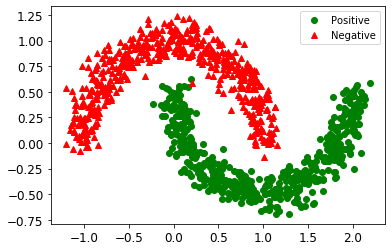

In [166]:
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label="Positive")
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label="Negative")
plt.legend()
plt.show()

Absorb bias $x_0 = 1$ into the  inputs

In [167]:
X_moons_with_bias = np.c_[np.ones((m,1)),X_moons]

In [168]:
X_moons_with_bias

array([[ 1.        ,  1.97416561, -0.10979094],
       [ 1.        ,  2.05086911,  0.09086988],
       [ 1.        , -0.1261885 ,  0.26773291],
       ...,
       [ 1.        ,  2.06779572,  0.18091295],
       [ 1.        , -0.7862558 ,  0.64236981],
       [ 1.        ,  1.16812572, -0.43787438]])

Reshape y train to get into a 2d array

In [169]:
y_moons_column_vector = y_moons.reshape(-1,1)

In [171]:
#split
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[:-test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column_vector[:-test_size]
y_test = y_moons_column_vector[-test_size:]

Ok, now lets creat a small function to generate training batches. In this implementation we randomly pick trainig smaples. Meaning that a single batch may contain the same instance multiple times, and therefore a single epoch may not cover all the training instances. However, this is generally not a problem

In [174]:
def random_batch(X_train,y_train,batch_size):
    rnd_indices = np.random.randint(0,len(X_train),batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return(X_batch,y_batch)

In [175]:
X_batch, y_batch = random_batch(X_train, y_train, 5)
X_batch

array([[ 1.        , -0.18235972,  0.86980148],
       [ 1.        ,  1.94277122,  0.41861651],
       [ 1.        ,  1.65106036, -0.27800204],
       [ 1.        ,  0.90758167, -0.00555286],
       [ 1.        , -0.73239699,  0.95218093]])

In [176]:
y_batch

array([[0],
       [1],
       [1],
       [0],
       [0]])

Letw slowly build up the model

In [177]:
reset_graph()
n_inputs = 2

We use a logistic regression model: 

Recall:
$\hat{p} = h_\theta (x) = \sigma (\theta^T x)$

The $\theta$ parameter vector, containing the bias term $\theta_0$ and the weights thetas through theta n contains the bias term $x_0 = 1$ as well as the input features.

Since we want to be able to make predicitons for multiple instnaces at a tme, we will an input matrix $\bf{X}$ rather than a sinlge input vector for each instance. It then becomes:

$\hat{p} = \sigma (\bf{(X\theta)}$

Now we can build the model!

In [178]:
X = tf.placeholder(tf.float32,shape = (None, n_inputs + 1),name="X")
y = tf.placeholder(tf.float32,shape=(None,1),name='y')
theta = tf.Variable(tf.random_uniform([n_inputs + 1,1],-1.0,1.0,seed=42),name='theta')
logits = tf.matmul(X,theta,name='logits')
y_proba = 1 / (1+ tf.exp(-logits))

In [179]:
y_proba = tf.sigmoid(logits)


$J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} \log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) \log\left(1 - \hat{p}^{(i)}\right)\right]}$

Implement ouselves


In [180]:
epsilon = 1e-7
loss = -tf.reduce_mean(y*tf.log(y_proba+epsilon)  + (1-y)*tf.log(1-y_proba + epsilon))

But could also just use the log loss function

In [181]:
loss = tf.losses.log_loss(y,y_proba) #uses 1e-7 by default

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [182]:
#set up the rest of the computation grpah
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

In [183]:
#init the variables
init = tf.global_variables_initializer()

Write the rest of the computation graph

In [184]:
n_epochs = 1500
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val = loss.eval({X: X_test, y: y_test})
        if epoch % 100 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)

    y_proba_val = y_proba.eval(feed_dict={X: X_test, y: y_test})
            

Epoch: 0 	Loss: 0.8182378
Epoch: 100 	Loss: 0.3180591
Epoch: 200 	Loss: 0.28040478
Epoch: 300 	Loss: 0.26421708
Epoch: 400 	Loss: 0.25596732
Epoch: 500 	Loss: 0.2511695
Epoch: 600 	Loss: 0.24788913
Epoch: 700 	Loss: 0.24576478
Epoch: 800 	Loss: 0.2445567
Epoch: 900 	Loss: 0.24291086
Epoch: 1000 	Loss: 0.24248724
Epoch: 1100 	Loss: 0.24198936
Epoch: 1200 	Loss: 0.24109025
Epoch: 1300 	Loss: 0.24087906
Epoch: 1400 	Loss: 0.24060279


Note: we dont use the epoch number when generating batches, so we could just have a sinlge for loop rather than a double loop. Buts it importnant to think of training in terms of the number of epochs (roughly the number of times the algorithm wen through the training set).

For each instance in the test set y_proba_val contains the estimated probabilit that it belongs to the positive class accoriding to the model. For example, here are the first 5 estimated probabilities

In [185]:
y_proba_val[:6]

array([[0.00275856],
       [0.9860338 ],
       [0.98700815],
       [0.7936355 ],
       [0.94911295],
       [0.02285618]], dtype=float32)

To classify each instance, we can for for MLE and assign when greater than 0.5

In [186]:
y_pred = (y_proba_val >=0.5)
y_pred[:5]

array([[False],
       [ True],
       [ True],
       [ True],
       [ True]])

Recall you can adjust the threshold to try to improve accuracy, at the cost of lower recall and precision

In [187]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, y_pred)

0.8979591836734694

In [188]:
recall_score(y_test, y_pred)

0.88

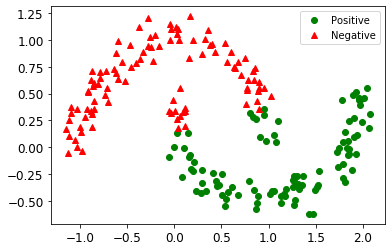

In [189]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

That's not too good, but reacall logistic regression has a linear decision boundary:

Now this time, lets start over but this time adding all the bells and whistles:

* Define the graph with a log_reg function
* save checkpoints using a Saver at regular intervals during training, and save tge final model at the end of training
* Restore the last checkpoint upon startup if training was interrupted
* Define the graph using nice scopes so the graph looks good in TensorBoard
* Add summaries to visiualize learning curves in TensotrBoard
* Try teweaking some hpyer parameters

Before we start we will4 more features to the inputs $x_1^{2}, x_2^{2}, x_3^{2}, x_4^{2}$ to show how adding features can imporve the model. 

Note you could use sklearn's polynomialfeatures, but we peforem this expansion manually

In [193]:
X_train_enhanced = np.c_[X_train,np.square(X_train[:,1]),
                        np.square(X_train[:,2]),
                        X_train[:,1]**3,
                        X_train[:,2]**3]

X_test_enhanced = np.c_[X_test,np.square(X_test[:,1]),
                       np.square(X_test[:,2]),
                       X_test[:,1]**3,
                        X_test[:,2]**3]

In [194]:
#check the shapes
print(X_train_enhanced.shape)
print(X_test_enhanced.shape)

(800, 7)
(200, 7)


In [195]:
X_train_enhanced[:5]

array([[ 1.00000000e+00,  1.97416561e+00, -1.09790942e-01,
         3.89732987e+00,  1.20540509e-02,  7.69397462e+00,
        -1.32342559e-03],
       [ 1.00000000e+00,  2.05086911e+00,  9.08698847e-02,
         4.20606412e+00,  8.25733594e-03,  8.62608698e+00,
         7.50343165e-04],
       [ 1.00000000e+00, -1.26188496e-01,  2.67732905e-01,
         1.59235366e-02,  7.16809086e-02, -2.00936713e-03,
         1.91913379e-02],
       [ 1.00000000e+00,  7.64453701e-01,  6.54477348e-01,
         5.84389461e-01,  4.28340599e-01,  4.46738687e-01,
         2.80339220e-01],
       [ 1.00000000e+00,  1.85118635e+00, -1.89645570e-01,
         3.42689091e+00,  3.59654422e-02,  6.34381369e+00,
        -6.82068678e-03]])

Now let's define the logistic regression function. We will leave out the deifintion of the inputs x and the targets y. We could include them but, leavin them out will it make it easier to relplicate this functoin in a wide range of use cases. Perhaps we wil want to add some preprocesing steps for the inputs before feeind them

In [196]:
def logistic_regression(X,y,initializer = None, seed=42,learning_rate=0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope("logistic_regression"):
        with tf.name_scope("model"):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias,1],-1.0,1.0,seed=seed)
            #set thetas
            theta = tf.Variable(initializer,name='theta')
            logits = tf.matmul(X,theta,name='logits')
            y_proba = tf.sigmoid(logits)
        with tf.name_scope("train"):
            loss = tf.losses.log_loss(y,y_proba,scope='loss')
            optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar("log_loss",loss)
        with tf.name_scope("init"):
            init = tf.global_variables_initializer()
        with tf.name_scope("save"):
            saver = tf.train.Saver()
    return(y_proba,loss,training_op,loss_summary,init,saver)








One more function to get the name of the log directory to save the summaries for Tensorboard

In [197]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = 'tf_logs'
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return("{}/{}".format(root_logdir,name))

Run the graph and save the files using filewriter

In [385]:
n_inputs = 2+4
logdir = log_dir("logreg")

X = tf.placeholder(tf.float32,shape=(None,n_inputs +1),name="X")
y = tf.placeholder(tf.float32,shape=(None,1),name="y")

y_proba,loss,training_op,loss_summary,init,saver = logistic_regression(X,y)

file_writer = tf.summary.FileWriter(logdir,tf.get_default_graph())

We can actually begin training our model. We will start by checking whether a previous training session was interrupted, and if so we will load the checkpoint and continue training from the epoch number we saved. In this example, we just save teh epoch number to a seperate file, but in chapter 11, we will see how to store the training step directly as part of the model. Using a non-trainable variable called global_step

You can try interrupting training to verify that it doest ineed restore the last checkpoint when you start it again...

In [386]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_logreg_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_logreg_model"

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))

    saver.save(sess, final_model_path)
    y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
    os.remove(checkpoint_epoch_path)

Epoch: 0 	Loss: 0.62877786
Epoch: 500 	Loss: 0.16100284
Epoch: 1000 	Loss: 0.11890707
Epoch: 1500 	Loss: 0.09718493
Epoch: 2000 	Loss: 0.083643876
Epoch: 2500 	Loss: 0.074311234
Epoch: 3000 	Loss: 0.06744907
Epoch: 3500 	Loss: 0.062173855
Epoch: 4000 	Loss: 0.057930898
Epoch: 4500 	Loss: 0.054515094
Epoch: 5000 	Loss: 0.051692456
Epoch: 5500 	Loss: 0.049304485
Epoch: 6000 	Loss: 0.047199287
Epoch: 6500 	Loss: 0.04536928
Epoch: 7000 	Loss: 0.043792583
Epoch: 7500 	Loss: 0.04236175
Epoch: 8000 	Loss: 0.041122686
Epoch: 8500 	Loss: 0.03999031
Epoch: 9000 	Loss: 0.038911253
Epoch: 9500 	Loss: 0.037978612
Epoch: 10000 	Loss: 0.037115537


In [387]:
y_pred = (y_proba_val >= 0.5)
precision_score(y_test, y_pred)


0.9797979797979798

In [388]:
recall_score(y_test, y_pred)


0.9797979797979798

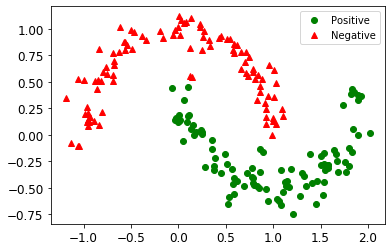

In [389]:
y_pred_idx = y_pred.reshape(-1) # a 1D array rather than a column vector
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'r^', label="Negative")
plt.legend()
plt.show()

check out the tensorboard afte completing this run

In [391]:
from scipy.stats import reciprocal

n_search_iterations = 10

for search_iteration in range(n_search_iterations):
    batch_size = np.random.randint(1,100)
    learning_rate = reciprocal(0.0001,0.1).rvs(random_state=search_iteration)
    
    n_inputs = 2+4
    logdir = log_dir("logreg")
    
    print("Iteration",search_iteration)
    print(" logdir:",logdir)
    print(" batch_size:",batch_size)
    print(" learning_rate:",learning_rate)
    print(" training:",end ="")
    
    reset_graph()
    
    X = tf.placeholder(tf.float32,shape=(None,n_inputs+1),name="X")
    y = tf.placeholder(tf.float32,shape=(None,1),name="y")
    
    y_proba,loss,training_op,loss_summary,init,saver = logistic_regression(X,y,learning_rate=learning_rate)
    
    file_writer = tf.summary.FileWriter(logdir,tf.get_default_graph())
    
    n_epochs = 10001
    n_batches = int(np.ceil(m/batch_size))
    
    final_model_path = "./my_logreg_model_%d" % search_iteration
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(n_epochs):
            for batch_index in range(n_batches):
                X_batch, y_batch = random_batch(X_train_enhanced, y_train, batch_size)
                sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            loss_val, summary_str = sess.run([loss, loss_summary], feed_dict={X: X_test_enhanced, y: y_test})
            file_writer.add_summary(summary_str, epoch)
            if epoch % 500 == 0:
                print(".", end="")

        saver.save(sess, final_model_path)

        print()
        y_proba_val = y_proba.eval(feed_dict={X: X_test_enhanced, y: y_test})
        y_pred = (y_proba_val >= 0.5)
        
        print("  precision:", precision_score(y_test, y_pred))
        print("  recall:", recall_score(y_test, y_pred))


Iteration 0
 logdir: tf_logs/logreg-run-20191223190703
 batch_size: 36
 learning_rate: 0.004430375245218265
 training:.....................
  precision: 0.9797979797979798
  recall: 0.9797979797979798
Iteration 1
 logdir: tf_logs/logreg-run-20191223190956
 batch_size: 75
 learning_rate: 0.0017826497151386947
 training:.....................
  precision: 0.9696969696969697
  recall: 0.9696969696969697
Iteration 2
 logdir: tf_logs/logreg-run-20191223191123
 batch_size: 86
 learning_rate: 0.00203228544324115
 training:.....................
  precision: 0.9696969696969697
  recall: 0.9696969696969697
Iteration 3
 logdir: tf_logs/logreg-run-20191223191235
 batch_size: 87
 learning_rate: 0.004491523825137997
 training:.....................
  precision: 0.9797979797979798
  recall: 0.9797979797979798
Iteration 4
 logdir: tf_logs/logreg-run-20191223192847
 batch_size: 61
 learning_rate: 0.07963234721775589
 training:.....................
  precision: 0.9801980198019802
  recall: 1.0
Iteration 5

TADA!!